In [10]:
import h5py
import numpy as np
import physig as ps
from matplotlib import pyplot as plt

In [18]:
# Set dir
dir1 = '/home/maspe/filer/testFiles/spiking_data/SERT1597/ch15_spatialFalse/ch15'
dir2 = '/home/maspe/filer/testFiles/spiking_data/SERT1597/ch15_spatialTrue/ch15'
dir3 = '/home/maspe/filer/testFiles/spiking_data/SERT1597/ch15_sim_same1/ch15'
dir4 = '/home/maspe/filer/testFiles/spiking_data/SERT1597/ch15_sim_same0/ch15'

In [19]:
# Open the files for reading
# f_w = '/home/maspe/filer/testFiles/spiking_data/continuous_data/Continuous_Data/Continuous_Data.basis.hdf5'
# f_cc = '/home/maspe/filer/testFiles/spiking_data/continuous_data/Continuous_Data/Continuous_Data.clusters.hdf5'
# f_ct = '/home/maspe/filer/testFiles/spiking_data/continuous_data/Continuous_Data/Continuous_Data.templates.hdf5'
# f_co = '/home/maspe/filer/testFiles/spiking_data/continuous_data/Continuous_Data/Continuous_Data.overlap.hdf5'
fit1 = dir1 + '.result.hdf5'
fit2 = dir2 + '.result.hdf5'
fit3 = dir3 + '.result.hdf5'
fit4 = dir4 + '.result.hdf5'

# whitening = h5py.File(f_w, 'r')
# clusters_clusters = h5py.File(f_cc, 'r')
# clusters_templates = h5py.File(f_ct, 'r')
# clusters_overlap = h5py.File(f_co, 'r')
fitting1 = h5py.File(fit1, 'r')
fitting2 = h5py.File(fit2, 'r')
fitting3 = h5py.File(fit3, 'r')
fitting4 = h5py.File(fit4, 'r')

In [29]:
fitting1['spiketimes']['temp_0']

<HDF5 dataset "temp_0": shape (43543,), type "<u4">

In [3]:
file = '/home/maspe/filer/testFiles/spiking_data/continuous_data/100_CH01.continuous'
channel = ps.loadContinuous(file)

Loading continuous data from /home/maspe/filer/testFiles/spiking_data/continuous_data/100_CH01.continuous


In [4]:
fitting['spiketimes']['temp_0'][0:10]

array([  751,  2776,  2824,  8091,  9522, 14879, 15616, 16180, 16482,
       16543], dtype=uint32)

In [1]:
keys = list(fitting['spiketimes'].keys())
n_neurons = len(keys)
neurons = [int(keys[this_neuron][5:]) for this_neuron in range(n_neurons)]
len_data = len(channel['data'])

spiketimes_matrix = np.zeros((n_neurons, len_data))

NameError: name 'fitting' is not defined

In [6]:
for neuron in range(n_neurons):
    spiketimes_matrix[neurons[neuron], fitting['spiketimes'][keys[neuron]]] = neuron

In [7]:
t_matrix = spiketimes_matrix[:, 0:1000000]
t_matrix[t_matrix == 0] = float('nan')

Text(0, 0.5, 'unit')

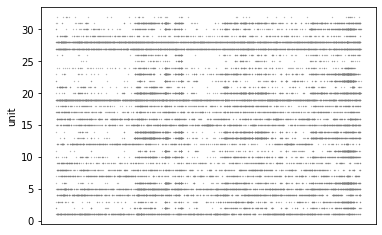

In [9]:
matrix2plot = t_matrix

# plt.subplot(2, 1, 1)
fig = plt.figure()
for neuron in range(n_neurons):
    plt.plot(matrix2plot[neuron, :], '.', color='gray', markersize=0.5)
    
plt.xticks([])
plt.ylabel('unit')
    
# plt.subplot(2, 1, 2)
# plt.plot(np.arange(0, matrix2plot.shape[1]), np.nansum(matrix2plot,0), '-', color='gray')
# plt.xlabel('time')
# plt.ylabel('counts')

#### Unused code

In [ ]:
# fig = plt.figure()
plt.eventplot(positions=t_matrix,
             orientation='horizontal', lineoffsets=1, linelengths=1, linewidths=None,
             colors='black', linestyles='solid')
plt.show()

In [11]:
fig.savefig("/home/maspe/filer/testFiles/figs/spikes.png", dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False)

In [ ]:
spikes    = fitting['spiketimes']['temp_0']
amps      = fitting['amplitudes']['temp_0'][:, 0] # The second column are amplitude for orthogonal, not needed
plt.plot(spikes, amps, '.')


In [ ]:
# for row in range(n_channels):
#     spiketimes_matrix[channels[row], fitting['spiketimes'][keys[row]]] = row